In [248]:
# 1. Análisis Exploratorio de los Datos (EDA)

In [250]:
import pandas as pd

# Leer CSV
df = pd.read_csv("2024_Accidentalidad.csv", sep = ";", encoding = "latin1")

# Forma del Dataset
print(df.shape)
# Nombre de cada columna
print(df.columns)
# Tipos de datos
print(df.dtypes)

(49340, 19)
Index(['ï»¿num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorolÃ³gico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga'],
      dtype='object')
ï»¿num_expediente         object
fecha                     object
hora                      object
localizacion              object
numero                    object
cod_distrito               int64
distrito                  object
tipo_accidente            object
estado_meteorolÃ³gico     object
tipo_vehiculo             object
tipo_persona              object
rango_edad                object
sexo                      object
cod_lesividad            float64
lesividad                 object
coordenada_x_utm         float64
coordenada_y_utm         float64
positiva_alcohol          object
positiva_droga           float64
dtype

In [252]:
# Conteo y Porcentaje de nulos por columnas

nulos = df.isna().sum()
pct_nulos = (nulos / len(df)) * 100

tabla_nulos = pd.DataFrame({
    "nulos": nulos,
    "pct_nulos": pct_nulos.round(2)
}).sort_values("pct_nulos", ascending=False)
print(tabla_nulos)

                       nulos  pct_nulos
positiva_droga         49137      99.59
lesividad              21996      44.58
cod_lesividad          21996      44.58
estado_meteorolÃ³gico   5916      11.99
tipo_vehiculo            394       0.80
positiva_alcohol         167       0.34
tipo_accidente             5       0.01
coordenada_x_utm           6       0.01
coordenada_y_utm           6       0.01
cod_distrito               0       0.00
distrito                   0       0.00
numero                     0       0.00
fecha                      0       0.00
tipo_persona               0       0.00
rango_edad                 0       0.00
sexo                       0       0.00
localizacion               0       0.00
hora                       0       0.00
ï»¿num_expediente          0       0.00


In [254]:
# Eliminamos columnas con muchos nulos
df = df.drop(columns=["positiva_droga"])

# Rellenamos nulos en columnas categoricas
df["estado_meteorolÃ³gico"] = df["estado_meteorolÃ³gico"].fillna("Desconocido")
df["tipo_vehiculo"] = df["tipo_vehiculo"].fillna("Desconocido")
df["lesividad"] = df["lesividad"].fillna("Desconocido")
df["cod_lesividad"] = df["cod_lesividad"].fillna("0")

# Eliminamos filas con nulos en columnas criticas
df.dropna(subset=["positiva_alcohol", "tipo_accidente", "coordenada_x_utm", "coordenada_y_utm"], inplace=True)

# Imprimimos para verificar que se cumplió
print(df.isna().sum())

ï»¿num_expediente        0
fecha                    0
hora                     0
localizacion             0
numero                   0
cod_distrito             0
distrito                 0
tipo_accidente           0
estado_meteorolÃ³gico    0
tipo_vehiculo            0
tipo_persona             0
rango_edad               0
sexo                     0
cod_lesividad            0
lesividad                0
coordenada_x_utm         0
coordenada_y_utm         0
positiva_alcohol         0
dtype: int64


In [256]:
# Eliminamos columnas innecesarias
df = df.drop(columns=["ï»¿num_expediente", "localizacion", "numero", "lesividad"])

# Convertimos a tipo Datetime
df["fecha"] = pd.to_datetime(df["fecha"], errors = "coerce")

# Agregamos columnas utiles
df["anio"] = df["fecha"].dt.year
df["mes"] = df["fecha"].dt.month
df["dia"] = df["fecha"].dt.dayofweek

# Convertimos la columna 'hora' a formato Datetime
df["hora"] = pd.to_datetime(df["hora"], format = "%H:%M:%S", errors = "coerce")

# Creamos nueva columna donde la hora se muestre en un solo numero
df["hora_num"] = df["hora"].dt.hour

In [258]:
rango_ordenado = [
    "Menor de 5 años", "De 6 a 9 años", "De 10 a 14 años", "De 15 a 17 años",
    "De 18 a 20 años", "De 21 a 24 años", "De 25 a 29 años", "De 30 a 34 años",
    "De 35 a 39 años", "De 40 a 44 años", "De 45 a 49 años", "De 50 a 54 años",
    "De 55 a 59 años", "De 60 a 64 años", "Más de 65 años", "Desconocido"
]
mapa_rango = {valor: idx for idx, valor in enumerate(rango_ordenado)}
df["rango_edad_cod"] = df["rango_edad"].map(mapa_rango)

In [260]:
mapa_sexo = {"Hombre": 0, "Mujer": 1, "Desconocido": 2}
df["sexo_cod"] = df["sexo"].map(mapa_sexo)

df["positiva_alcohol"] = df["positiva_alcohol"].map({"S": 1, "N": 0})

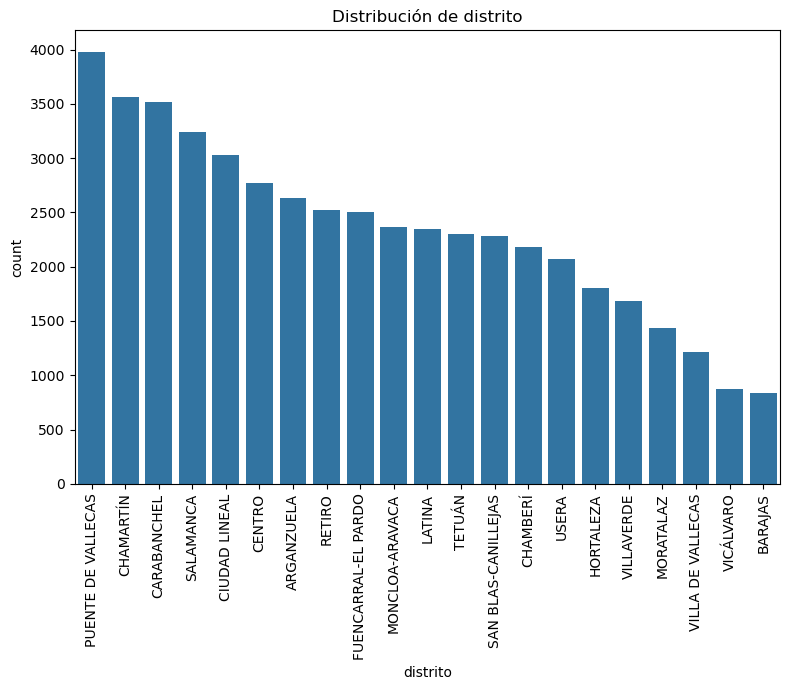

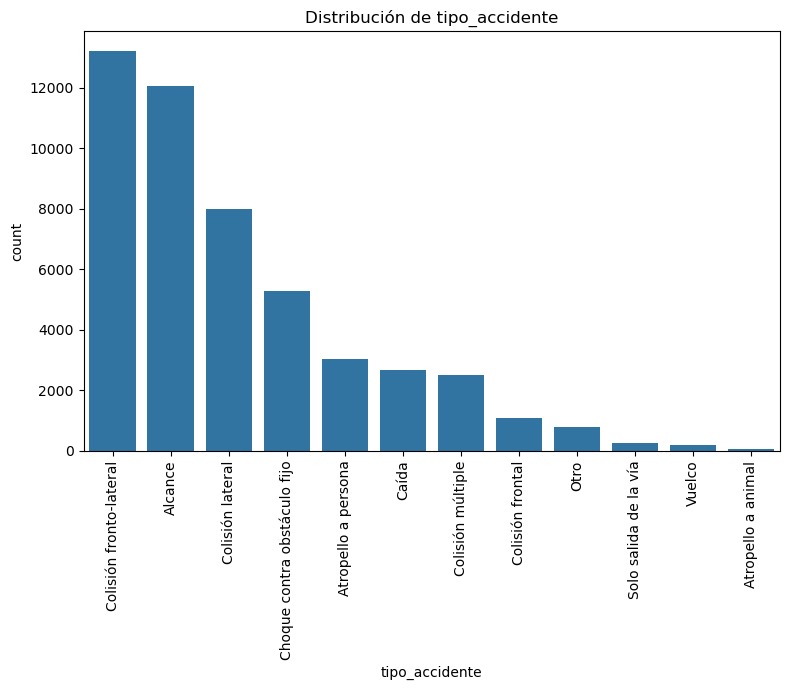

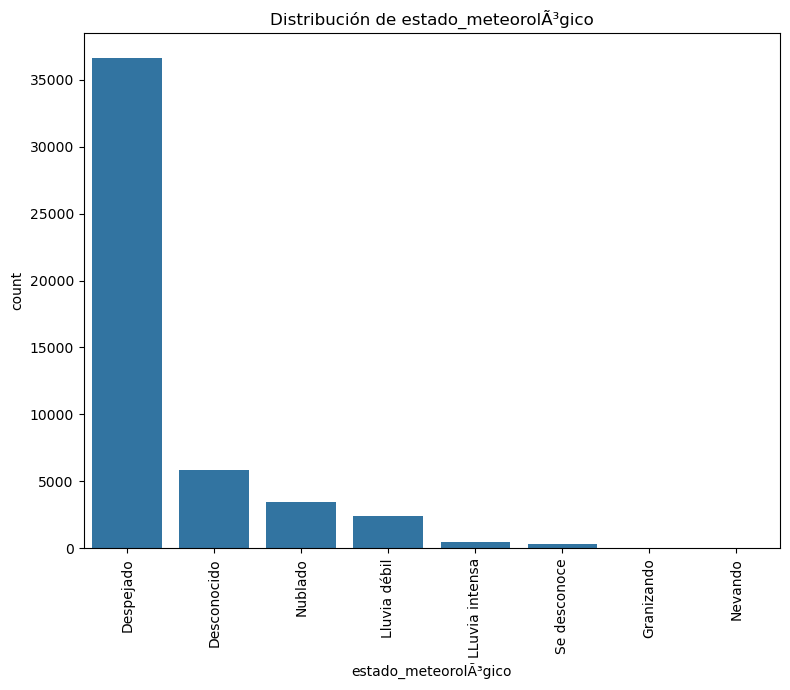

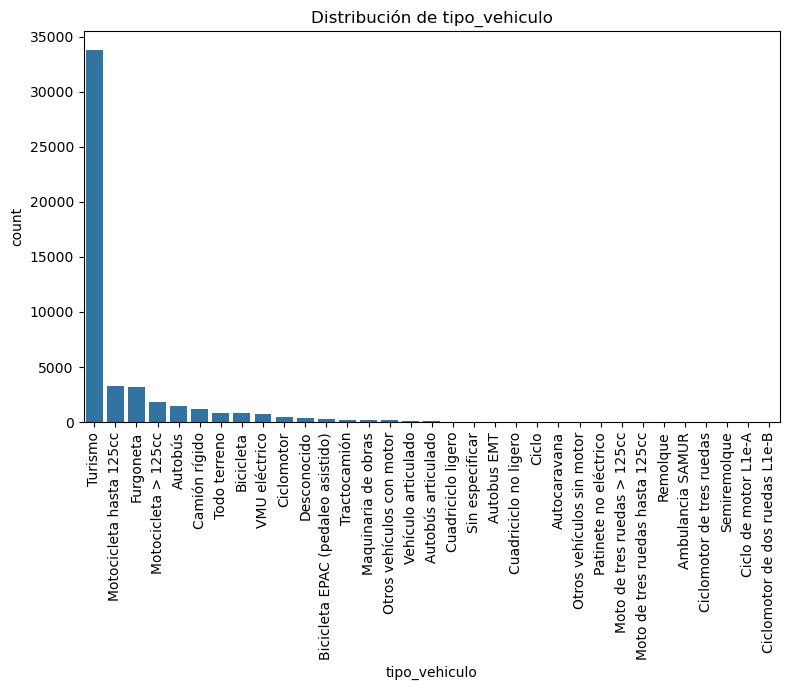

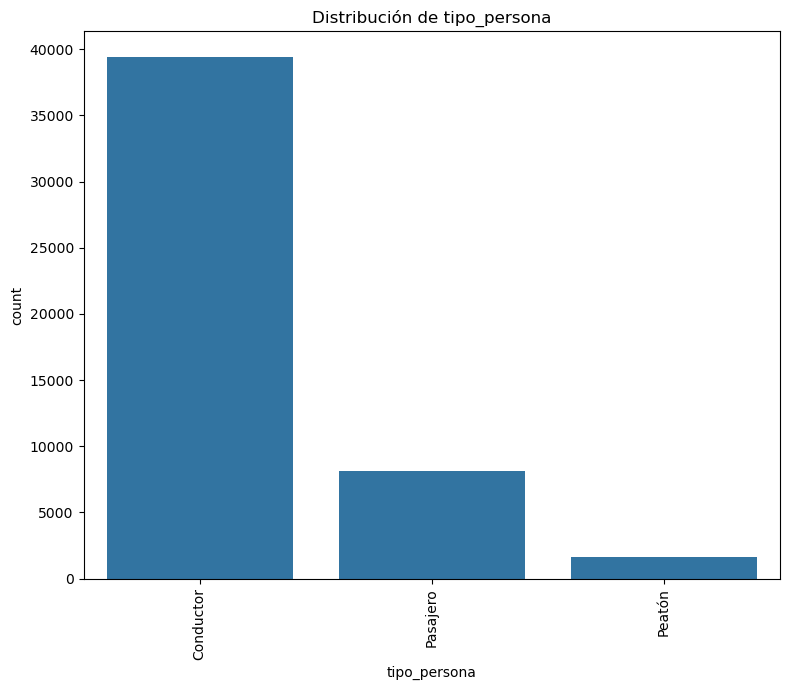

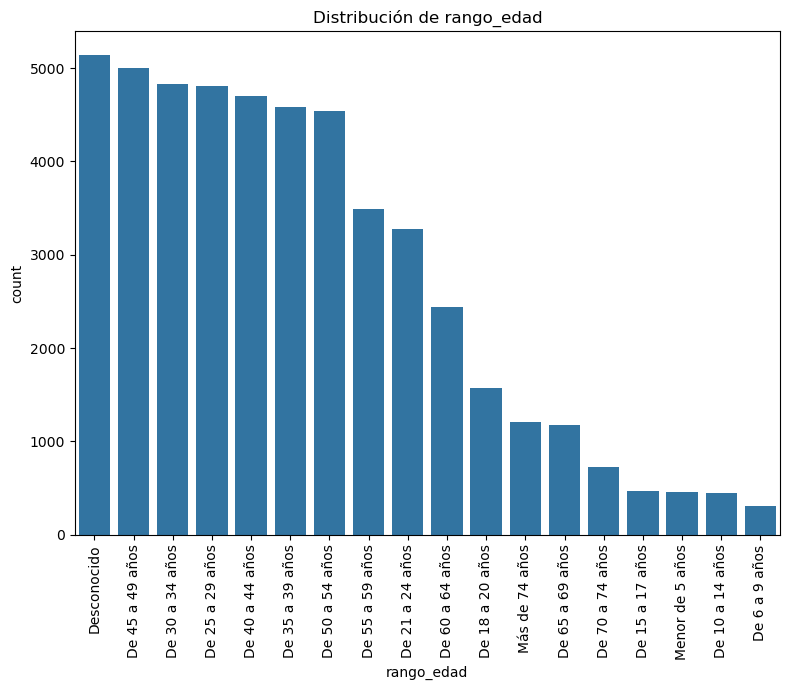

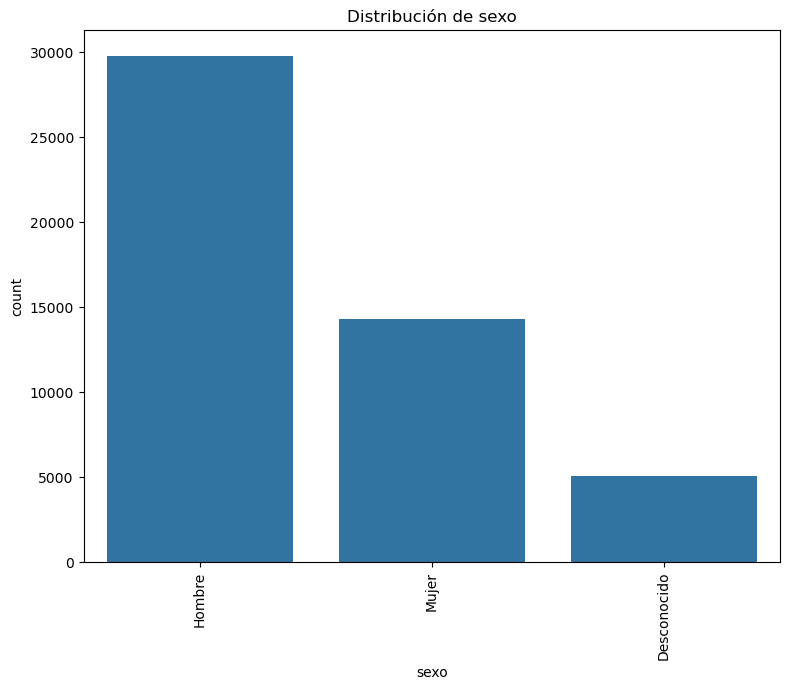

In [262]:
# Analisis univariante

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'DejaVu Sans'

# Lista de columnas categoricas
cat_cols = ["distrito", "tipo_accidente", "estado_meteorolÃ³gico", "tipo_vehiculo",
            "tipo_persona", "rango_edad", "sexo"]

for col in cat_cols:
    df[col] = df[col].astype(str).apply(lambda x: x.encode('latin1').decode('utf-8'))
    plt.figure(figsize=(8,7))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

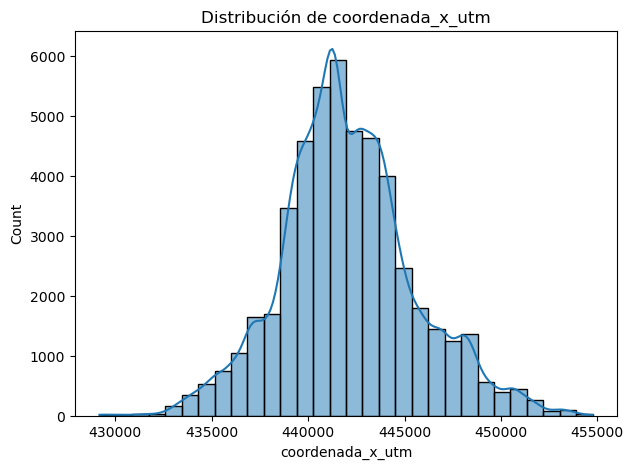

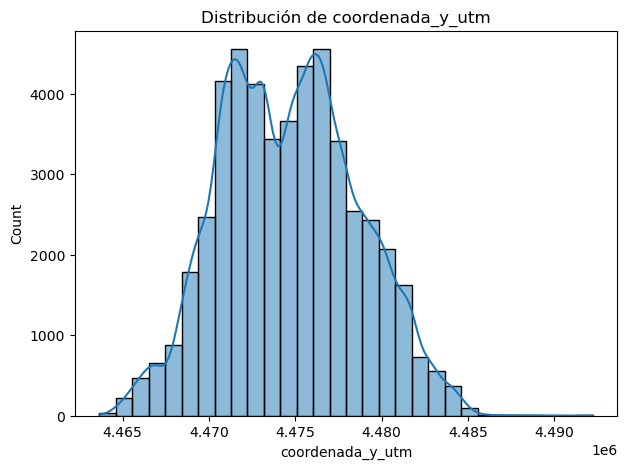

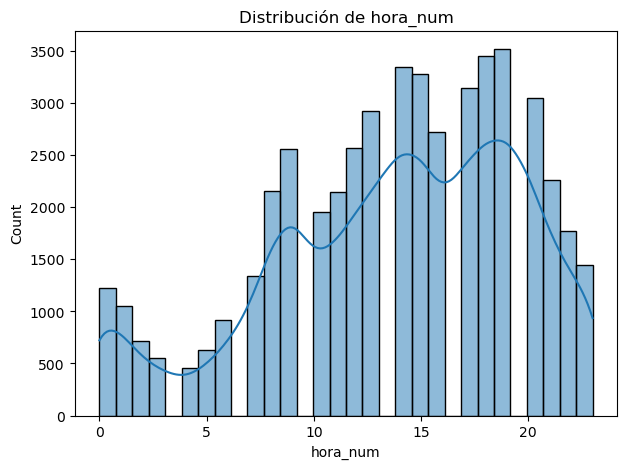

In [263]:
# Variables numericas
num_cols = ["coordenada_x_utm", "coordenada_y_utm", "hora_num"]

for col in num_cols:
    plt.figure(figsize=(7,5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

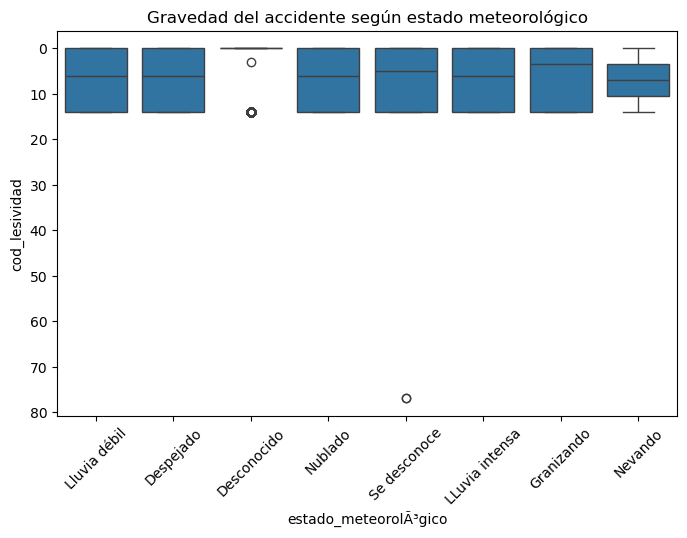

In [264]:
# Analisis Bivariante       Estado meteorologico y Gravedad
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="estado_meteorolÃ³gico", y="cod_lesividad")
plt.title("Gravedad del accidente según estado meteorológico")
plt.xticks(rotation=45)
plt.show()

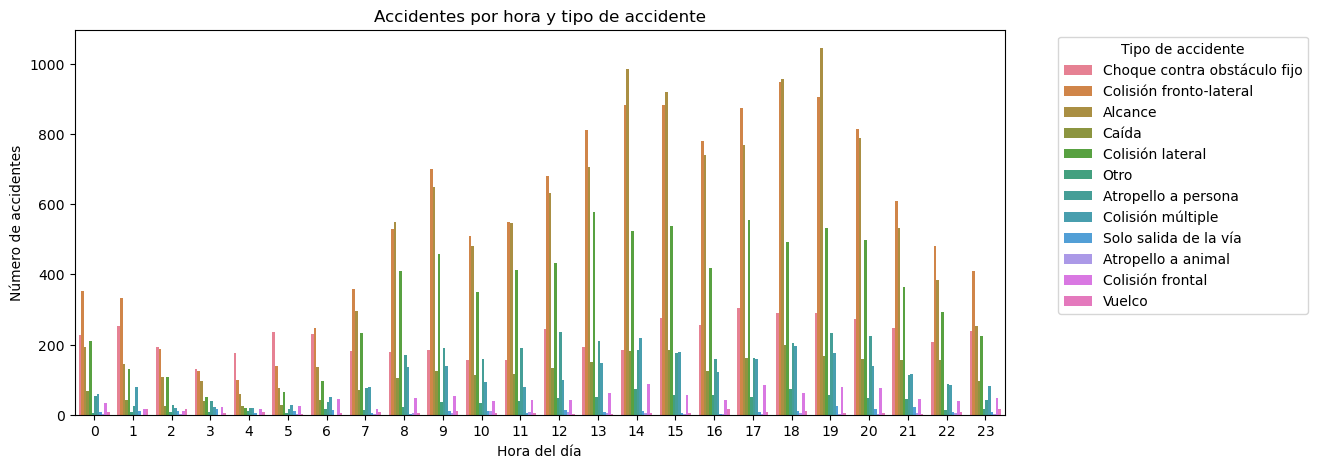

In [266]:
# Analisis bivariante    Hora y Tipo de accidente
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="hora_num", hue="tipo_accidente")
plt.title("Accidentes por hora y tipo de accidente")
plt.xlabel("Hora del día")
plt.ylabel("Número de accidentes")
plt.legend(title="Tipo de accidente", bbox_to_anchor=(1.05, 1))
plt.show()

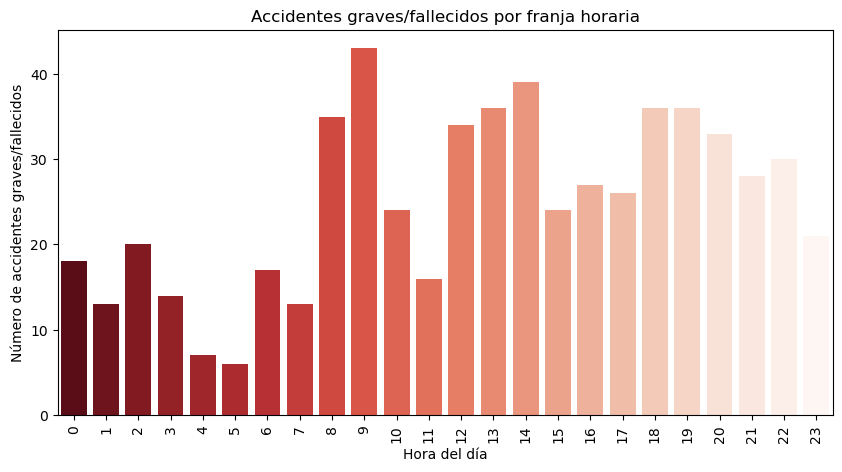

In [267]:
# Filtrar solo graves y fallecidos
df_graves = df[df["cod_lesividad"].isin([3, 4])]

# Agrupar por hora
gravedad_por_hora = df_graves.groupby("hora_num").size().reset_index(name="num_accidentes")

# Visualizar
plt.figure(figsize=(10,5))
sns.barplot(data=gravedad_por_hora, x="hora_num", y="num_accidentes", hue="hora_num", palette="Reds_r", legend=False)
plt.title("Accidentes graves/fallecidos por franja horaria")
plt.xlabel("Hora del día")
plt.ylabel("Número de accidentes graves/fallecidos")
plt.xticks(rotation=90)
plt.show()

In [269]:
# ¿En qué franja horaria se producen los accidentes con mayor gravedad (ingreso superior a 24 horas o fallecidos) y qué condiciones (estado meteorológico, tipo de accidente, etc.) pueden influir en ello?

## Los accidentes con mayor gravedad (ingreso superior a 24 horas o fallecidos) se producen principalmente en las franjas de 08:00–10:00, volviendo con un pico entre las 12:00-14:00 y 18:00–20:00 horas, coincidiendo con los desplazamientos laborales.
## Las condiciones que influyen en la gravedad son principalmente el estado meteorológico adverso (lluvia, nublado, granizo) y el tipo de accidente (colisiones frontales y atropellos).
## Durante la madrugada, aunque los accidentes son menos numerosos, tienden a ser más graves, probablemente asociados a velocidad elevada y menor visibilidad.


In [274]:
## Estudio de la temporalidad con series de tiempo
## Convertir la columna fecha a un índice temporal y explorar la distribución de los accidentes a lo largo del tiempo. Investigar tendencias o mensuales.

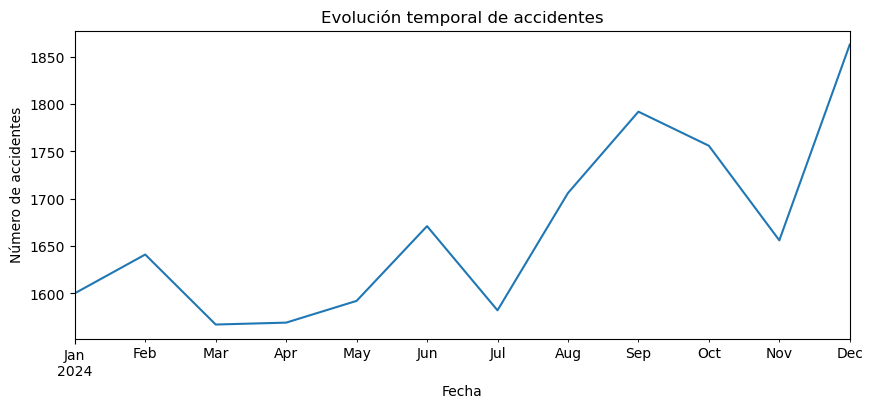

In [276]:
df["fecha"] = pd.to_datetime(df["fecha"])
df.set_index("fecha", inplace=True)

# Agrupar por mes
mensual = df.resample("ME").size()

plt.figure(figsize=(10,4))
mensual.plot()
plt.title("Evolución temporal de accidentes")
plt.xlabel("Fecha")
plt.ylabel("Número de accidentes")
plt.show()

# Se observan picos en determinados meses, por ejemplo desde Julio a Septiembre, lo que concluimos que seria por tráfico vacacional de verano.
# El otro pico notable va desde noviembre a Diciembre, donde cocluimos que seria por temas climaticos, poca visibilidad, lluvia, entre otros, ya que son mesese de la temporada de Otoño-Invierno.

In [278]:
# 2. Modelo de Regresión Logística

In [280]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Copiamos dataset original
df_model = df.copy()

# Selección de variables predictoras
features = [
    "tipo_accidente", "tipo_vehiculo", "tipo_persona", "sexo",
    "estado_meteorolÃ³gico", "distrito", "hora_num", "rango_edad"
]

X = df_model[features]
y = df_model["positiva_alcohol"]

# One-hot encoding de variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Escalado de variables numéricas
scaler = StandardScaler()
cols_num = ["hora_num"]  # y si rango_edad es numérica también se incluye aquí
X[cols_num] = scaler.fit_transform(X[cols_num])

# División train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño train:", X_train.shape)
print("Tamaño test:", X_test.shape)

Tamaño train: (39330, 92)
Tamaño test: (9833, 92)


In [282]:
import importlib
import models

importlib.reload(models)

from models import AlcoholLogisticModel

# Crear y entrenar
model = AlcoholLogisticModel()
model.fit(X_train, y_train)

# Evaluar
metrics = model.evaluate(X_test, y_test)
print(metrics)

# Guardar modelo
model.save_model("alcohol_model.pkl")

{'accuracy': 0.9708125699176243, 'precision': 0.5, 'recall': 0.003484320557491289, 'f1_score': 0.006920415224913495, 'confusion_matrix': array([[9545,    1],
       [ 286,    1]], dtype=int64)}


In [284]:
print("""
El modelo de regresión logística entrenado para predecir si un implicado da positivo en alcohol muestra una accuracy muy alta (97%), pero con un 
recall extremadamente bajo. Esto significa que el modelo predice casi siempre que los implicados no dan positivo en alcohol, ya que los casos
positivos son muy pocos en comparación con los negativos.

Al conectarlo con la pregunta de negocio inicial del EDA (“¿En qué franja horaria se producen los accidentes con mayor gravedad y qué condiciones
influyen en ello?”), los resultados del modelo apoyan la misma conclusión: la incidencia de positivos en alcohol es muy baja, lo que dificulta que
el modelo aprenda patrones claros. Esto indica que, aunque el alcohol puede estar relacionado con accidentes graves en horas nocturnas o fines de
semana, su frecuencia es insuficiente para ser un factor principal en el dataset.

En resumen, tanto el EDA como el modelo sugieren que la gravedad de los accidentes está más influida por factores como la franja horaria (madrugada),
el tipo de accidente (atropellos y colisiones múltiples) y condiciones contextuales (meteorología y distritos concretos), mientras que el consumo de
alcohol aparece como un factor relevante pero poco frecuente en los registros disponibles.
""")


El modelo de regresión logística entrenado para predecir si un implicado da positivo en alcohol muestra una accuracy muy alta (97%), pero con un 
recall extremadamente bajo. Esto significa que el modelo predice casi siempre que los implicados no dan positivo en alcohol, ya que los casos
positivos son muy pocos en comparación con los negativos.

Al conectarlo con la pregunta de negocio inicial del EDA (“¿En qué franja horaria se producen los accidentes con mayor gravedad y qué condiciones
influyen en ello?”), los resultados del modelo apoyan la misma conclusión: la incidencia de positivos en alcohol es muy baja, lo que dificulta que
el modelo aprenda patrones claros. Esto indica que, aunque el alcohol puede estar relacionado con accidentes graves en horas nocturnas o fines de
semana, su frecuencia es insuficiente para ser un factor principal en el dataset.

En resumen, tanto el EDA como el modelo sugieren que la gravedad de los accidentes está más influida por factores como la franja h

In [289]:
import zipfile
import os

folder = r"C:\Users\samud\Downloads\PROYECTO FINAL"
files_to_zip = ["ProyectoFinal1.ipynb", "models.py", "test_models.py"]  # lista de archivos a incluir

with zipfile.ZipFile("PROYECTO_FINAL.zip", "w") as zipf:
    for file in files_to_zip:
        filepath = os.path.join(folder, file)
        if os.path.exists(filepath):
            zipf.write(filepath, arcname=file)

print("✅ Zip creado sin incluir el dataset")

✅ Zip creado sin incluir el dataset
